#用主成分分析降维

现在是时候升一级了！主成分分析（Principal component analysis，PCA）是本书介绍的第一个高级技术。到目前为止都是些简单的统计学知识，而PCA将统计学和线性代数组合起来实现降维，堪称简单模型的杀手锏。

<!-- TEASER_END -->

##Getting ready

PCA是scikit-learn的一个分解模块。还有一些分解模块后面会介绍。让我们用`iris`数据集演示一下，你也可以用自己的数据集：

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data

##How to do it...

首先导入分解模块：

In [2]:
from sklearn import decomposition

然后，初始化一个PCA对象：

In [3]:
pca = decomposition.PCA()
pca

PCA(copy=True, n_components=None, whiten=False)

和scikit-learn其他对象相比，PCA的参数很少。这样PCA对象就创建了，下面用`fit_transform`处理`iris_X`数据：

In [6]:
iris_pca = pca.fit_transform(iris_X)
iris_pca[:5]

array([[ -2.68420713e+00,  -3.26607315e-01,   2.15118370e-02,
          1.00615724e-03],
       [ -2.71539062e+00,   1.69556848e-01,   2.03521425e-01,
          9.96024240e-02],
       [ -2.88981954e+00,   1.37345610e-01,  -2.47092410e-02,
          1.93045428e-02],
       [ -2.74643720e+00,   3.11124316e-01,  -3.76719753e-02,
         -7.59552741e-02],
       [ -2.72859298e+00,  -3.33924564e-01,  -9.62296998e-02,
         -6.31287327e-02]])

这样PCA就完成了，我们可以看看降维的效果：

In [8]:
pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557,  0.01718514,  0.00518309])

##How it works...

PCA是在数据分析中有一般性的数学定义和具体的应用场景。PCA用正交向量集表示原始数据集。

通常，PCA将原始数据集映射到新的空间中，里面每个列向量都是彼此正交的。从数据分析的视角看，PCA将数据集的协方差矩阵变换成若干能够“解释”一定比例变量的列向量。例如，在`iris`数据集中，92.5%的变量可以由第一个主成份表示。

数据分析里面维度多会导致维度灾难，因此降维至关重要。通常算法处理高维训练集时会出现拟合过度（overfit）的情况，于是难以把握测试集的一般性特征。如果数据集的真实结构可以用更少的维度表示，那么通常都值得一试。

为了演示这点，我们用PCA将`iris`数据集转换成二维数据。`iris`数据集用全部的维度通常可以很好的分类：

In [9]:
pca = decomposition.PCA(n_components=2)
iris_X_prime = pca.fit_transform(iris_X)
iris_X_prime.shape

(150, 2)

我们的矩阵现在是$150 \times 2$，不是$150 \times 4$了。二维变量更容易可视化：

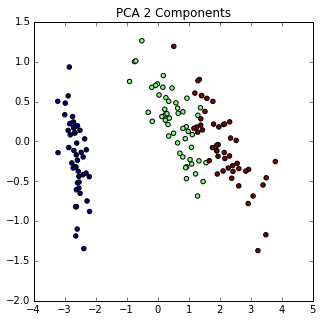

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
f = plt.figure(figsize=(5, 5))
ax = f.add_subplot(111)
ax.scatter(iris_X_prime[:,0], iris_X_prime[:, 1], c=iris.target)
ax.set_title("PCA 2 Components")

把数据集降成二维之后还是分离特征依然保留。我们可以查看这二维数据保留了多少变量信息：

In [11]:
pca.explained_variance_ratio_.sum()

0.97763177502480336

##There's more...

PCA对象还可以一开始设置解释变量的比例。例如，如果我们想介绍98%的变量，PCA对象就可以这样创建：

In [15]:
pca = decomposition.PCA(n_components=.98)
iris_X_prime = pca.fit_transform(iris_X)
pca.explained_variance_ratio_.sum()

0.99481691454981014

In [16]:
iris_X_prime.shape

(150, 3)

由于我们想比二维主成份解释更多的变量，第三维就需要了。